# Employee Exit Survery

In this project, we will be analysing exit survey from employees of Department of Education, Training and Employment and the Technical and Further Education. We will be primarily focused on answering below two questions:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


In [5]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
dete_survey.name = 'Department of Education, Training and Employment'
tafe_survey = pd.read_csv('tafe_survey.csv')
tafe_survey.name = 'Technical and Further Education'

In [6]:
def data_know(df_nm):
    print(df_nm.name)
    #print(df_nm.info())
    #print(df_nm.head())
    #print(df_nm.isnull().sum())

data_know(dete_survey)
data_know(tafe_survey)
#print(dete_survey['SeparationType'].value_counts())
#print(tafe_survey['Reason for ceasing employment'].value_counts())

Department of Education, Training and Employment
Technical and Further Education


**Department of Education, Training and Employment**
    - It includes 822 rows and 56 columns
    - 9 different serperation reason have been mentioned while Age Retirement is the most common in this data set.
    - Missing values are observed
    
**Technical and Further Education**
    - It includes 702 rows and 72 columns. Column names are messed up
    - 6 different serperation reason have been mentioned while Resignation is the most common in this data set.
    - Missing values are observed

In [7]:
dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated')

In [8]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In the above two cells, we have identified Not Stated values to missing and also dropped columns that are not necessary for this analysis.

** Update column names in dete data**

In [9]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()
#print(dete_survey_updated.columns)

**Update column names in tafe data**

In [10]:
tafe_survey_updated.rename(columns={"Record ID":"id", "CESSATION YEAR":"cease_date", "Reason for ceasing employment":"separationtype", "Gender. What is your Gender":"gender", "CurrentAge. Current Age":"age", "Employment Type. Employment Type":"employment_status", "Classification. Classification":"position", "LengthofServiceOverall. Overall Length of Service at Institute (in years)":"institute_service", "LengthofServiceCurrent. Length of Service at current workplace (in years)":"role_service"},inplace=True)

In [11]:
#print(dete_survey_updated.head())
#print(tafe_survey_updated.head())

Next, we're intereseted in working with Resigned employees only. So, we will extract just those rows

In [12]:
#print(dete_survey_updated['separationtype'].value_counts())
#print(tafe_survey_updated['separationtype'].value_counts())

In [13]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
#print(dete_resignations['separationtype'].value_counts())


In [14]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation',na=False)].copy()
#print(tafe_resignations['separationtype'].value_counts())

In above two steps, we have removed all other seperation type except Resignations. Finally, in dete data we have 311 records and in tafe we have 340 records.

In [15]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
09/2010      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

In [16]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.rpartition('/').get(2).astype('float')

In [17]:
dete_resignations["cease_date"].value_counts().sort_index(ascending=True)
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=True)
tafe_resignations["cease_date"].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [18]:
boxplot = dete_resignations.boxplot(column=['cease_date', 'dete_start_date'])

In [19]:
boxplot = tafe_resignations.boxplot(column=['cease_date'])

In [20]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
dete_resignations["institute_service"].value_counts().sort_index(ascending=True)
boxplot = dete_resignations.boxplot(column=['institute_service'])
tafe_resignations["institute_service"].value_counts().sort_index(ascending=True)

1-2                   64
11-20                 26
3-4                   63
5-6                   33
7-10                  21
Less than 1 year      73
More than 20 years    10
Name: institute_service, dtype: int64

In the above step, we have calculated number of years employee worked in the company before resigning. This will help to answer our core question for this anlaysis.

In [21]:
#print(tafe_resignations.columns)
#print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
#print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())
#print(dete_resignations['dissatisfaction_with_the_department'].value_counts())

In [22]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']].any(1, skipna=False)
#print(tafe_resignations['dissatisfied'].value_counts())
#print(dete_resignations['dissatisfied'].value_counts())
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In the above step, we have created a column dissatisfied which shows if an employee is diisatisfied or not based on the few factors that we considered. If employee is dissatisfied, then we have marked it True if not then False.

In [23]:
dete_resignations_up['institute '] = 'DETE'
tafe_resignations_up['institute '] = 'TAFE'

In [24]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

combined.notnull().sum().sort_values()
combined_updated = combined.dropna(thresh = 500, axis =1).copy()
combined_updated.notnull().sum().sort_values()

institute_service    563
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
institute            651
separationtype       651
dtype: int64

In [27]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [32]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)').astype('float')

combined_updated['institute_service'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [34]:
def service(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif 3 <= val < 6:
        return 'Experienced'
    elif 7 <= val < 11:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat']=combined_updated['institute_service'].apply(service)

   

In [39]:
combined_updated['service_cat'].value_counts().sort_values()

Established     62
Veteran        153
Experienced    155
New            193
Name: service_cat, dtype: int64

In [43]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [45]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [46]:
table = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
table

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.316129
New,0.295337
Veteran,0.496732


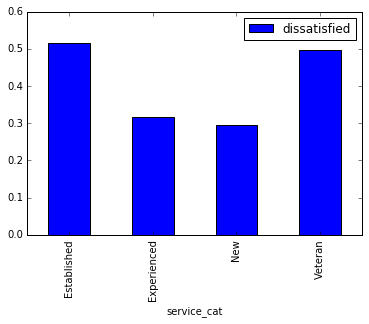

In [48]:
%matplotlib inline
table.plot(kind='bar')

From the above graph, we can see experience & veteran employees are more dissatisifed & resigning when compared to New & Experienced employees.